# Priyanka Marwadi
# K-means clustering and Fuzzy C-means clustering from scratch

### README

    I have programmed in Jupyter Notebook with python version - 3.9

    You can open the Jupyter notebook and run cell by cell cell or full code together.

    dataset file needs to be in same folder as the code or the dataset_name variable can be chnaged with location of file at top of the code.


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
# for jupyter notebook
%matplotlib inline 
pd.options.mode.chained_assignment = None  # default='warn'

## 1. K-means clustering with different numbers of clusters

In [3]:
# Input 1a
dataset_name = 'diabetic_data.csv' 
df = pd.read_csv(dataset_name)
df_1000 = df.sample(1000)            # randomly select 1000 data points
df_1a = df_1000.filter(items=['time_in_hospital','num_medications'])  # seperating the desired data from rest of dataset
df_1a = df_1a.reset_index(drop=True)

In [4]:
# Randomly selecting centroids
def get_centroids(dataFrame, k):
    '''
    Function get_centroids
    input:
        k - no of centroids (selected k)
        df - pandas data frame of selected data
    output:
        centroids - return random k select entrees from given data frame
    '''
    centroids = dataFrame.sample(k)   # randamly seecting centroids from dataset
    return centroids

# Calculate distance between datapoint and centroid
def distanceFn(p1,p2):
    '''
    Function distance calculate distance of data point from centroid 
    input:
        p1 - point from data frame
        p2 - selected centroid
    output:
        dist - distance function value between two given points
    '''
    dist = np.sqrt(np.sum(np.square(p1-p2)))   # calculate Euclidian distance
    return dist


# Assign centroids to datasets
def assign_centroids(dataFrame, centroids):
    '''
    Function assign centroids
        assigns closest centroid to each dataset value
    input:
        data - pandas data frame of given data
        centroid - pandas data frame of selected number of centroids
    output:
        data drame with assigned centroids and cost (min distance centroid)
    '''
    data = dataFrame.copy()
    data['centroid'] = ""      
    data['MinDist'] = ""

    for i in range(len(data)):        # for all the selected datapoints
        dist_vector = []
        for j in range(len(centroids)):    # for all the number of clusters
            dist_vector.append(distanceFn(data.iloc[i,:],centroids.iloc[j,:]))  # calculate the distance between a datapoint to a centroid

        mindist = min(dist_vector)   # update the minimum distance from a centroid to a particular data point
        data['centroid'][i] = dist_vector.index(mindist)   # assign index of minimun distant datapoint to centroid
        data['MinDist'][i] = mindist
    return data
    
def plotClusters(df, centroids):
    '''
    given data frame with associated centroid and centroids locations this function will return scatters plot with clusters marked in different colors
    Limit: As color map vector I have setup is with 10 colors it will be able to plot upto 10 clusters i.e k=10 
    '''
    k = len(centroids)
    color_list = ["peru","gold","yellowgreen","royalblue","crimson", "mediumblue", "darkmagenta","violet","skyblue","wheat","grey"]
    customcmap = ListedColormap(color_list[:k])
    fig, ax = plt.subplots(figsize=(6, 6))
    s1=plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
                c=df['centroid'].astype('category'), 
                cmap = customcmap, s=80, alpha=0.5)
    s2=plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
                marker = 's', s=200, c=range(k), 
                cmap = customcmap,edgecolors='black')
    ax.set_xlabel(r'[x1] '+df.columns[0], fontsize=14)
    ax.set_ylabel(r'[x2] '+df.columns[1], fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    axis_min = min(min(df.iloc[:,0]),min(df.iloc[:,1]))-1
    axis_max = max(max(df.iloc[:,0]),max(df.iloc[:,1]))+1
    plt.xlim([axis_min,axis_max])
    plt.ylim([axis_min,axis_max])
    #plt.grid('on')
    ax.legend([s1, s2], ['data points', 'centroids'])
    # Annotete cluster center with number for reference
    for i in range(k):
        ax.annotate(i+1, (centroids.iloc[i,0], centroids.iloc[i,1]))
    plt.title('K='+str(k))
    plt.show()

def kmeans(dataFrame, k, tol=1e-3):
    '''
    K-means implementation 
    input- 
        dataFrame - pandas data frame of given data
        k - number of clusters
        to - tolerance (for stopping the iterations), defalut - 1E-3
    output-
        data - pandas dataframe with assigned centroids and distance of point from that centroid as added data variables in dataset
        centroids - final centroids locations
    '''
    
    data = dataFrame.copy() # copy dataset
    
    MinDist_sum = [] # stopping signal and a counter for the iterations
    flag = True
    j = 0
    
    # Step 2: Initiate clusters by defining centroids 
    centroids = get_centroids(dataFrame,k)    # randomly assign centroids 

    while(flag):
        # Assign centroids and calculate MinDist_sum
        data = assign_centroids(data, centroids)  # assign minimum distance index to centroids
        MinDist_sum.append(sum(data['MinDist']))    
        

        # Update centroid position
        centroids = data.groupby('centroid').mean().reset_index(drop = True)   
        # group the datapoint w.r.t the assigned centroids, then calculate the mean of datapoint in each centroid. And reassign centroids wih this updated mean values.

        # Restart the iteration
        if j>0:
            # Is the MinDist_sum less than a tolerance (1e-3)
            if MinDist_sum[j-1]-MinDist_sum[j]<=tol:
                flag = False
        j = j+1
    
    #print(j)
    data = assign_centroids(data, centroids)
    return data, centroids

### 1a. K-means with K=2 
        Random 1000 data points 
        variables:‘time_in_hospital’, and ‘num_medications’

K-means clustering for k = 2


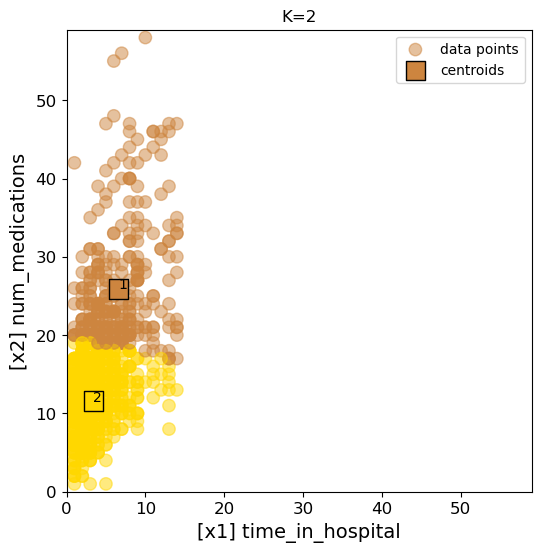

Centroid locations for k = 2
   time_in_hospital  num_medications
0          6.579755        25.907975
1          3.421365        11.556380


In [6]:
k = 2
print("K-means clustering for k =",k)
clustered_data_1a, final_centroids_1a = kmeans(df_1a,k)  # updated centroid after multiple iterations and the change in centroid is now less than (1e-3)  
plotClusters(clustered_data_1a,final_centroids_1a)
print("Centroid locations for k =",k)
print(final_centroids_1a)

### 1b. K-means with K = 2 to 10 
        variables:‘time_in_hospital’, and ‘num_medications’

K-means clustering for k = 2


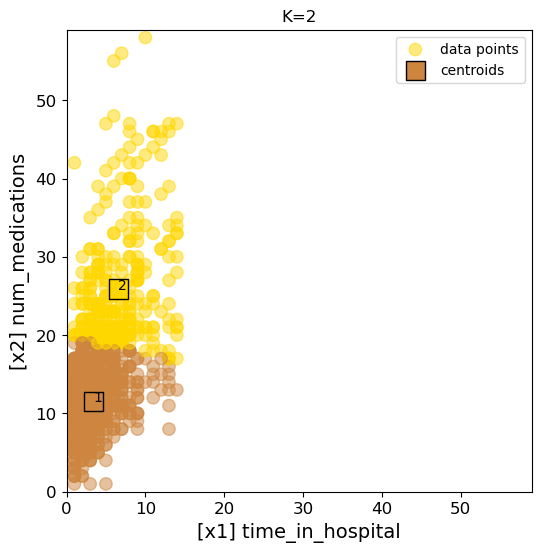

K-means clustering for k = 3


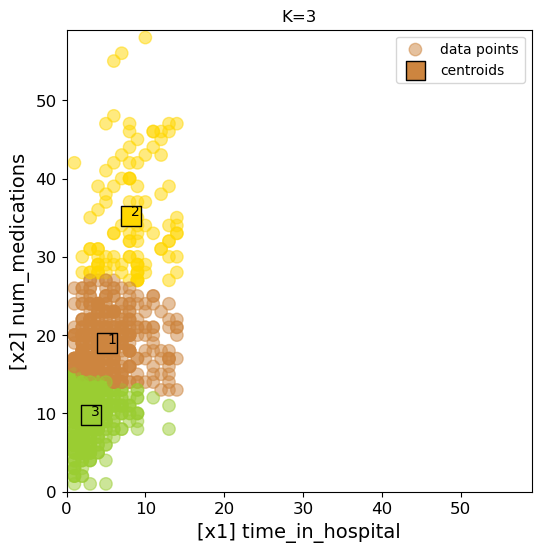

K-means clustering for k = 4


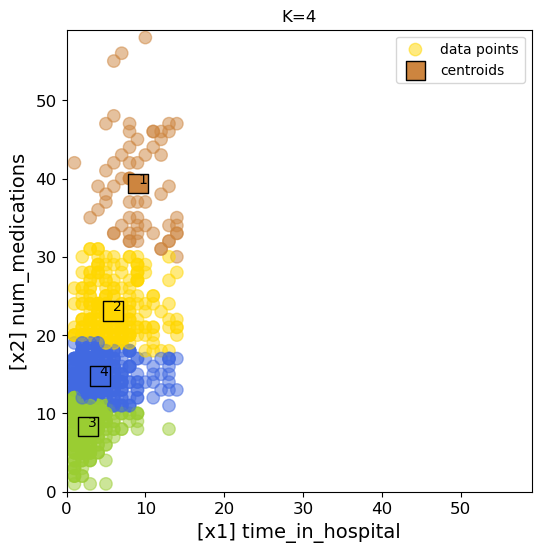

K-means clustering for k = 5


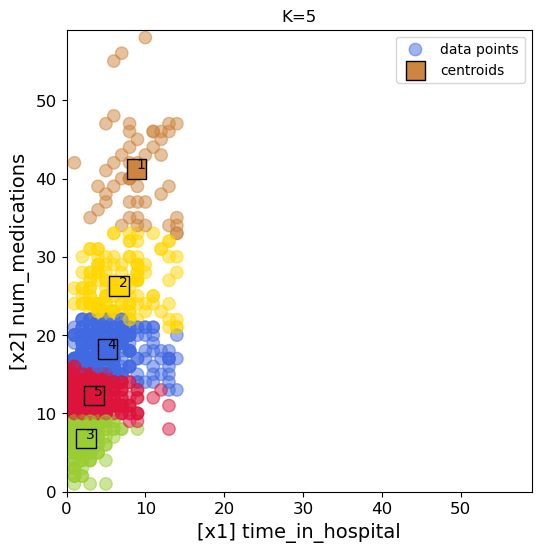

K-means clustering for k = 6


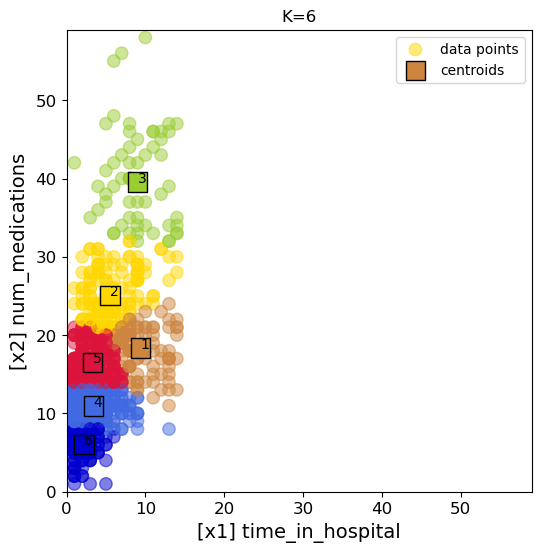

K-means clustering for k = 7


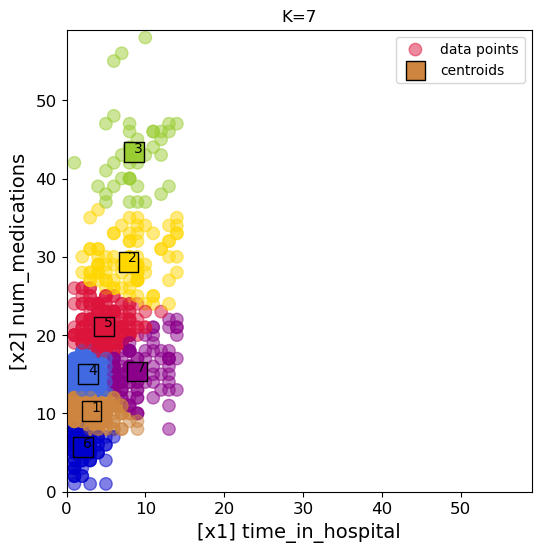

K-means clustering for k = 8


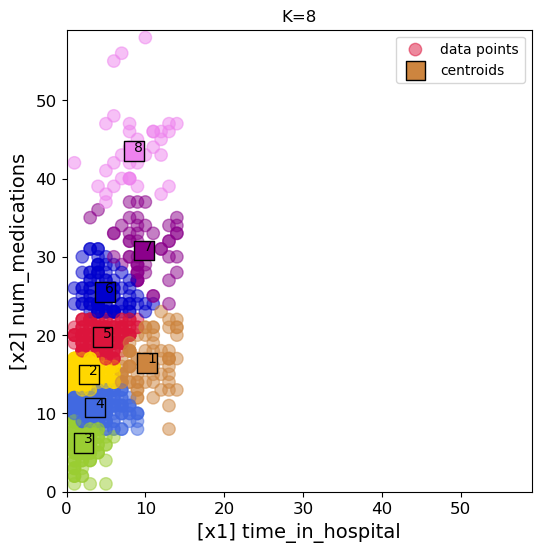

K-means clustering for k = 9


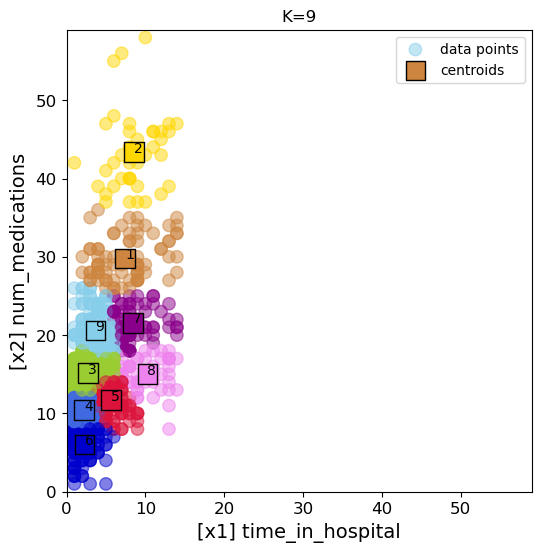

K-means clustering for k = 10


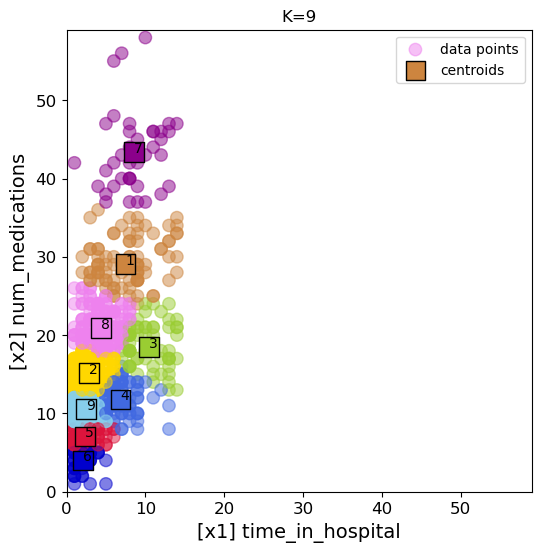

In [7]:
k = range(2,11) # 2 to 10
for i in range(len(k)):    
    print("K-means clustering for k =",k[i])
    clustered_data_1b, final_centroids_1b = kmeans(df_1a,k[i])   
    plotClusters(clustered_data_1b,final_centroids_1b)

### 1c. Dunn Index (DI) cluster validity
 

In [8]:
def min_distance_closest_cluster(cluster_list):
    '''
    given list of clusters find out the minimun distances between the two nearest points of clusters.
    input:
        cluster_list - list of pandas dataframes of each cluster
    output:
        min_distance - distance between two nearest points between nearest clusters
    '''
    min_distance = np.Inf
    for k in range(len(cluster_list)-1):
        for l in range(1,len(cluster_list)):
            if k >= l:
                continue
            cluster1 = cluster_list[k]
            cluster2 = cluster_list[l]
            #print(k,l)
            for i in range(len(cluster1)):
                for j in range(len(cluster2)):
                    temp_dist = distanceFn(cluster1.iloc[i,:],cluster2.iloc[j,:])
                    min_distance = min(min_distance,temp_dist)
                    #print(temp_dist)
            #print('ij',i,j)
    return min_distance


def max_cluster_diameter(cluster_list):
    '''
    given list of clusters find out the minimun distances between the two nearest points of clusters.
    input:
        cluster_list - list of pandas dataframes of each cluster
    output:
        max_diameter - maximum diameter between given clusters
    '''
    max_diameter = 0
    for i in range(len(cluster_list)):
        cluster = cluster_list[i]
        for j in range(len(cluster)-1):
            for k in range(1,len(cluster)):
                if j >= k:
                    continue
                temp_dist = distanceFn(cluster.iloc[j,:],cluster.iloc[k,:])
                max_diameter = max(max_diameter,temp_dist)
        #print(max_diameter)
    return max_diameter

def DunnIdx(cluster_list):
    '''
    given list of clusters find out the Dunn index.
    input:
        cluster_list - list of pandas dataframes of each cluster
    output:
        dunn_idx - dunn index number
    '''  
    min_distance = min_distance_closest_cluster(cluster_list) # calculate smallest distance between any two clusters from all availble clusters
    max_diameter = max_cluster_diameter(cluster_list)   # calculte the cluster with maximum diameter i.e. the maximum distance between furtherest points in a single cluster
    dunn_idx = min_distance/max_diameter
    return dunn_idx

def cluster_list(clustered_dataFrame,k):
    '''
    given clustered_dataFrame it returns list of dataFrames for individual cluster or centroid.
    input:
        clustered_dataFrame - clustered dataFrame output file from algorithem
        k - number of clusters
    output:
        cluster_list - list of pandas dataframes of each cluster
    '''  
    cluster_list = []
    for i in range(k):
        temp_cluster = clustered_dataFrame[clustered_dataFrame['centroid']==i] 
        cluster_list.append(temp_cluster.iloc[:,:2])
    return cluster_list


K-means clustering for k = 2


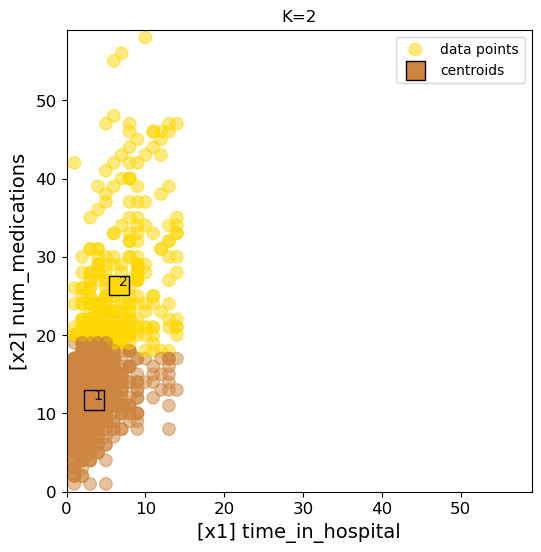

Dunn Index for [k = 2 ] =   0.024929982747211407
Centroid locations for k = 2
   time_in_hospital  num_medications
0          3.472543        11.734104
1          6.649351        26.347403
K-means clustering for k = 3


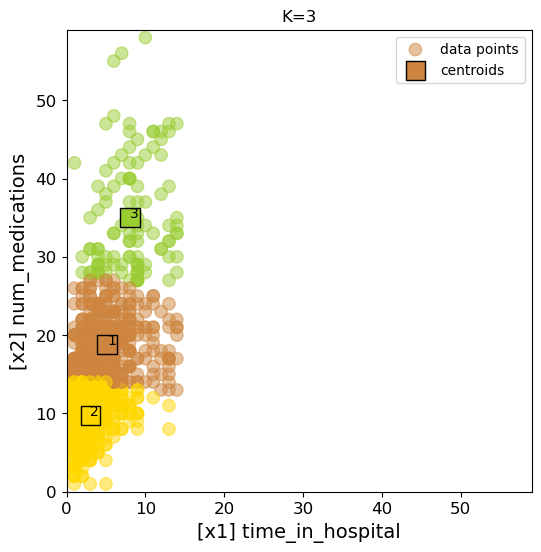

Dunn Index for [k = 3 ] =   0.03210806495339678
Centroid locations for k = 3
   time_in_hospital  num_medications
0          5.144578        18.809639
1          3.023061         9.744235
2          8.092593        35.009259
K-means clustering for k = 4


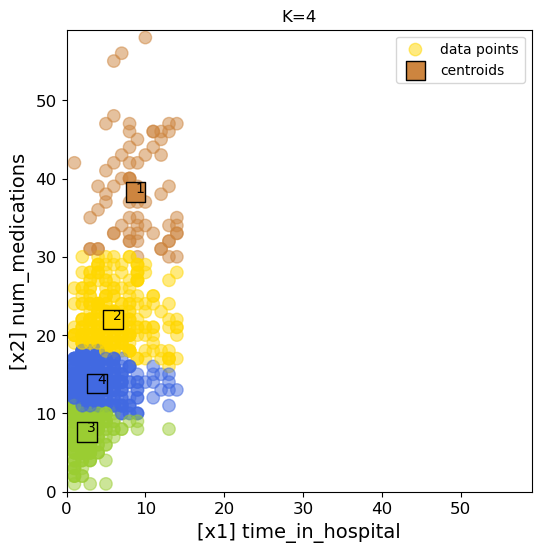

Dunn Index for [k = 4 ] =   0.035355339059327376
Centroid locations for k = 4
   time_in_hospital  num_medications
0          8.767123        38.273973
1          5.901460        21.992701
2          2.584615         7.642308
3          3.872774        13.811705
K-means clustering for k = 5


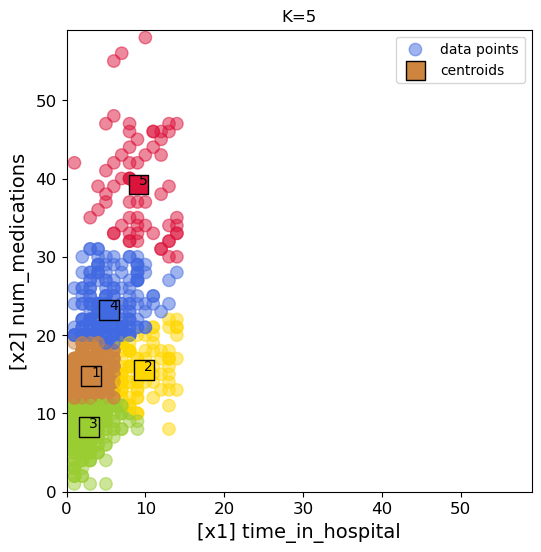

Dunn Index for [k = 5 ] =   0.035355339059327376
Centroid locations for k = 5
   time_in_hospital  num_medications
0          3.101266        14.781646
1          9.800000        15.550000
2          2.810726         8.239748
3          5.409910        23.234234
4          9.153846        39.230769
K-means clustering for k = 6


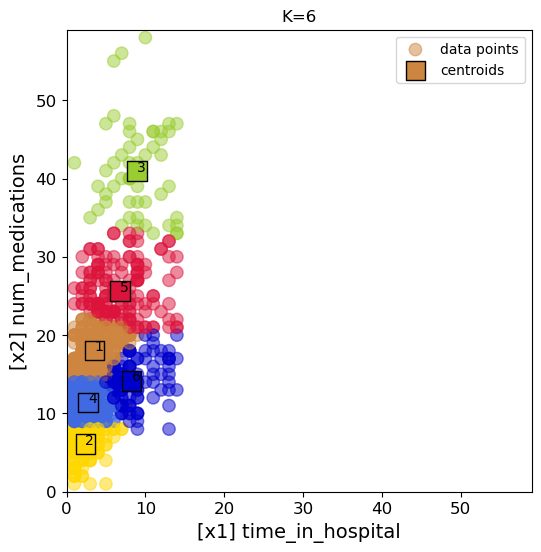

Dunn Index for [k = 6 ] =   0.03949762527666821
Centroid locations for k = 6
   time_in_hospital  num_medications
0          3.541667        18.012500
1          2.397260         6.102740
2          8.924528        40.924528
3          2.745763        11.376271
4          6.748344        25.609272
5          8.252174        14.165217
K-means clustering for k = 7


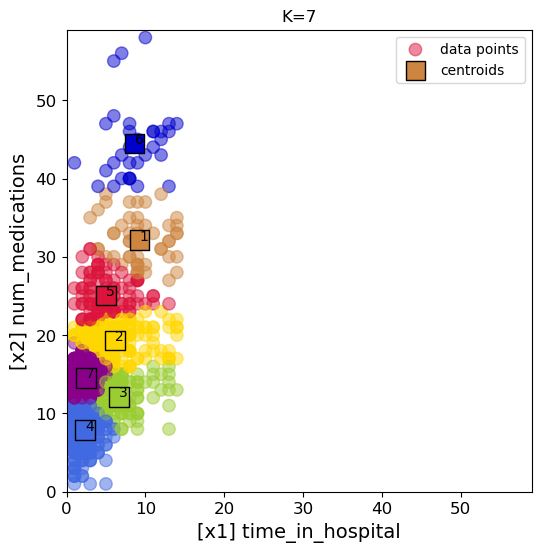

Dunn Index for [k = 7 ] =   0.05018856132284956
Centroid locations for k = 7
   time_in_hospital  num_medications
0          9.240000        32.140000
1          6.170330        19.329670
2          6.656489        12.137405
3          2.334559         7.889706
4          5.000000        25.078431
5          8.636364        44.454545
6          2.452174        14.560870
K-means clustering for k = 8


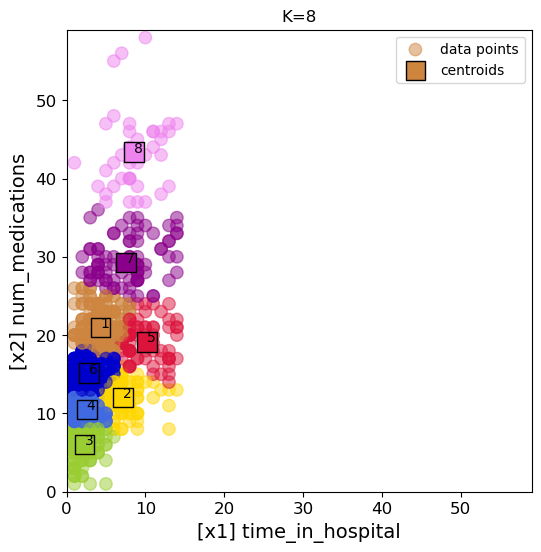

Dunn Index for [k = 8 ] =   0.04632410546120795
Centroid locations for k = 8
   time_in_hospital  num_medications
0          4.309524        20.970238
1          7.195652        12.010870
2          2.281690         6.049296
3          2.569231        10.517949
4         10.225806        19.145161
5          2.841121        15.158879
6          7.545455        29.261364
7          8.564103        43.358974
K-means clustering for k = 9


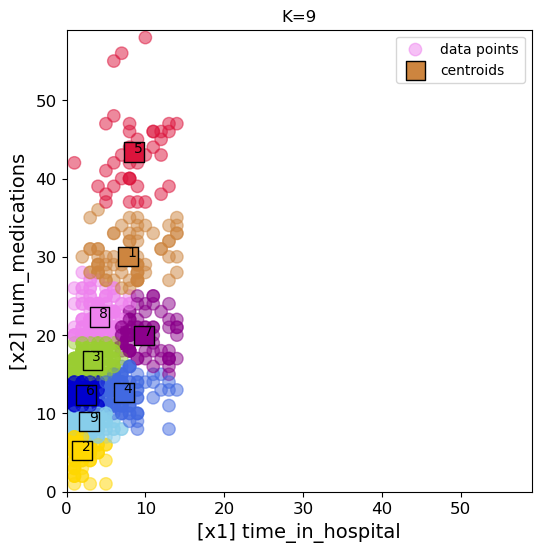

Dunn Index for [k = 9 ] =   0.04632410546120795
Centroid locations for k = 9
   time_in_hospital  num_medications
0          7.780822        30.054795
1          1.958763         5.247423
2          3.283237        16.774566
3          7.264706        12.676471
4          8.564103        43.358974
5          2.454023        12.379310
6          9.838235        19.955882
7          4.182540        22.309524
8          2.885135         8.945946
K-means clustering for k = 10


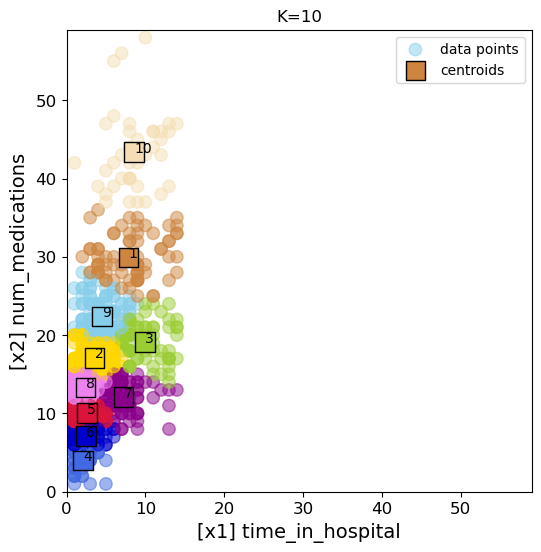

Dunn Index for [k = 10 ] =   0.04632410546120795
Centroid locations for k = 10
   time_in_hospital  num_medications
0          7.866667        29.920000
1          3.567742        17.116129
2          9.940299        19.089552
3          2.127660         4.000000
4          2.582192        10.020548
5          2.432990         7.082474
6          7.224719        12.056180
7          2.420382        13.312102
8          4.468750        22.398438
9          8.564103        43.358974


In [9]:
k = range(2,11) # 2 to 10
dunnidx_vector = []
for i in range(len(k)):
    print("K-means clustering for k =",k[i])
    clustered_data_1c, final_centroids_1c = kmeans(df_1a,k[i])
    plotClusters(clustered_data_1c,final_centroids_1c)
    clusterlist_1c = cluster_list(clustered_data_1c,k[i])
    dunnidx_vector.append(DunnIdx(clusterlist_1c))
    print("Dunn Index for [k =",k[i],'] =  ',dunnidx_vector[i])
    print("Centroid locations for k =",k[i])
    print(final_centroids_1c)

#### K vs Dunn Index Plot

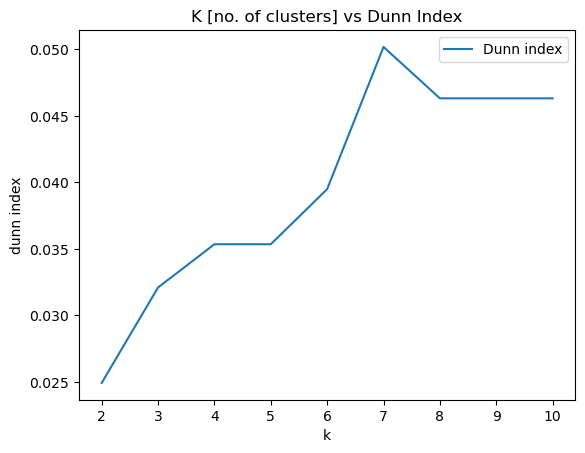

In [10]:
# Dunn Index Plot
plt.plot(k,dunnidx_vector)
plt.xlabel('k')
plt.ylabel('dunn index')
plt.legend(['Dunn index'])
plt.title('K [no. of clusters] vs Dunn Index')
plt.show()

### 2. K-means clustering with different variables and sample size

### 2a. K-means with Best K selected [k = 7]
        Random 500 data points 
        variables:‘time_in_hospital’,‘num_medications’,'insulin'

In [21]:
# Best No. of clusters based on 1c
k = 7


# Input 2a
df_500 = df.sample(500) # randomly select 500 data points
df_2a = df_500.filter(items=['time_in_hospital','num_medications','insulin'])
df_2a = df_2a.reset_index(drop=True)
insulin_map = {'No':0, 'Steady':1, 'Up':2, 'Down':3} # Mapping values to interger calculations
df_2a.insulin = [insulin_map[item] for item in df_2a.insulin] # Replacing string data in insulin with mapped integers


In [22]:
def plotClusters3D(df, centroids):
    '''
    given data frame (3 variables) with associated centroid and centroids locations this function will return 3D scatters plot with clusters marked in different colors
    Limit: As color map vector I have setup is with 10 colors it will be able to plot upto 10 clusters i.e k=10 
    '''
    fig = plt.figure(figsize = (6, 6))
    ax = plt.axes(projection ="3d")
    
    # Creating plot
    color_list = ["peru","gold","yellowgreen","royalblue","crimson", "mediumblue", "darkmagenta","violet","skyblue","wheat","grey"]
    customcmap = ListedColormap(color_list[:k])
    s1 = ax.scatter3D(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], marker = 'o', c=df['centroid'].astype('category'), cmap = customcmap, s=80, alpha=0.5)
    s2 = ax.scatter3D(centroids.iloc[:,0], centroids.iloc[:,1], centroids.iloc[:,2], marker = 's', s=200, c=range(k), cmap = customcmap,edgecolors='black')
    ax.set_xlabel(r'[x1] '+df.columns[0], fontsize=8)
    ax.set_ylabel(r'[x2] '+df.columns[1], fontsize=8)
    ax.set_zlabel(r'[x3] '+df.columns[2], fontsize=8)

    axis_min = min(min(df.iloc[:,0]),min(df.iloc[:,1]),min(df.iloc[:,2]))-1
    axis_max = max(max(df.iloc[:,0]),max(df.iloc[:,1]),max(df.iloc[:,2]))+1
    plt.xlim([axis_min,axis_max])
    plt.ylim([axis_min,axis_max])
    ax.legend([s1, s2], ['data points', 'centroids'])
    plt.title('K='+str(k))
    
    # show plot
    plt.show()


K-means clustering for [k = 7 ], 3 variables


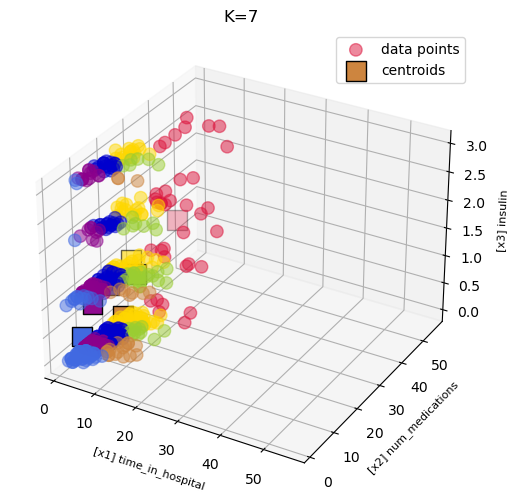

Dunn Index for [k = 7 ], 3 variables =   0.032461373658059775


In [23]:
print("K-means clustering for [k =",k,'], 3 variables')
clustered_data_2a, final_centroids_2a = kmeans(df_2a,k)
plotClusters3D(clustered_data_2a,final_centroids_2a)
clusterlist_2a = cluster_list(clustered_data_2a,k)
dunnidx_2a = DunnIdx(clusterlist_2a)
print("Dunn Index for [k =",k,'], 3 variables =  ',dunnidx_2a)

### 2b. K-means with Best K selected [k = 7]
        Random 500 data points 
        variables:‘time_in_hospital’,‘num_medications’, 
                  'insulin','diabetesMed','change'
        Dunn index

K-means clustering for [k = 7 ], 5 variables


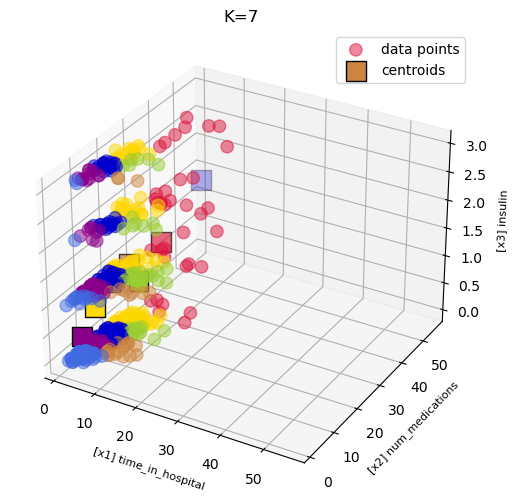

Dunn Index for [k = 7 ], 5 variables =   0.052558833122763673


In [24]:
# Input 2b
df_2b = df_500.filter(items=['time_in_hospital','num_medications','insulin','diabetesMed', 'change'])
df_2b = df_2b.reset_index(drop=True)
diabeticsMed_map = {'No':0, 'Yes':1} # Mapping values to interger calculations
change_map = {'No':0, 'Ch':1} # Mapping values to interger calculations
df_2b.insulin = [insulin_map[item] for item in df_2b.insulin] # Replacing string data in insulin with mapped integers
df_2b.diabetesMed = [diabeticsMed_map[item] for item in df_2b.diabetesMed] # Replacing string data in insulin with mapped integers
df_2b.change = [change_map[item] for item in df_2b.change] # Replacing string data in insulin with mapped integers


print("K-means clustering for [k =",k,'], 5 variables')
clustered_data_2b, final_centroids_2b = kmeans(df_2b,k)
plotClusters3D(clustered_data_2a,final_centroids_2b)
clusterlist_2b = cluster_list(clustered_data_2b,k)
dunnidx_2b = DunnIdx(clusterlist_2b)
print("Dunn Index for [k =",k,'], 5 variables =  ',dunnidx_2b)

### 2c. K-means with Best K selected [k = 7]
        Random 50 observations from 1000 data points from 1a
        Random 100 observations from 1000 data points from 1a
        variables:‘time_in_hospital’,‘num_medications’, 
                  'insulin','diabetesMed','change'
        Dunn Index

In [25]:
# Input 2c
df_2c_50 = df_1000.sample(50)
df_2c_50_5v = df_2c_50.filter(items=['time_in_hospital','num_medications','insulin','diabetesMed', 'change'])
df_2c_50_5v = df_2c_50_5v.reset_index(drop=True)
df_2c_50_5v.insulin = [insulin_map[item] for item in df_2c_50_5v.insulin] # Replacing string data in insulin with mapped integers
df_2c_50_5v.diabetesMed = [diabeticsMed_map[item] for item in df_2c_50_5v.diabetesMed] # Replacing string data in insulin with mapped integers
df_2c_50_5v.change = [change_map[item] for item in df_2c_50_5v.change] # Replacing string data in insulin with mapped integers

df_2c_100 = df_1000.sample(100)
df_2c_100_5v = df_2c_100.filter(items=['time_in_hospital','num_medications','insulin','diabetesMed', 'change'])
df_2c_100_5v = df_2c_100_5v.reset_index(drop=True)
df_2c_100_5v.insulin = [insulin_map[item] for item in df_2c_100_5v.insulin] # Replacing string data in insulin with mapped integers
df_2c_100_5v.diabetesMed = [diabeticsMed_map[item] for item in df_2c_100_5v.diabetesMed] # Replacing string data in insulin with mapped integers
df_2c_100_5v.change = [change_map[item] for item in df_2c_100_5v.change] # Replacing string data in insulin with mapped integers

df_2c_50_3v = df_2c_50_5v.iloc[:,:3]
df_2c_100_3v = df_2c_100_5v.iloc[:,:3]

K-means clustering for [k = 7 ], 3 variables, 50 observations


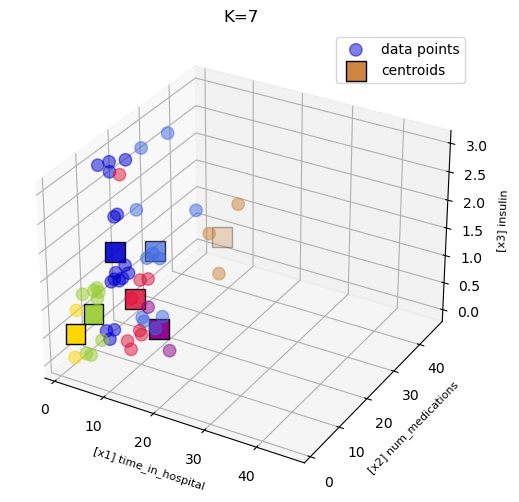

Dunn Index for [k = 7 ], 3 variables, 50 observations =   0.1174440439029407
K-means clustering for [k = 7 ], 3 variables, 100 observations


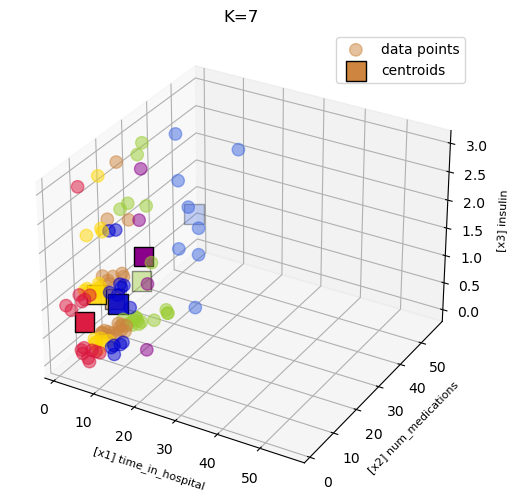

Dunn Index for [k = 7 ], 3 variables, 100 observations =   0.035355339059327376


In [26]:
# Rerun 2a 3 variables
print("K-means clustering for [k =",k,'], 3 variables, 50 observations')
clustered_data_50_3v, final_centroids_50_3v = kmeans(df_2c_50_3v,k)
plotClusters3D(clustered_data_50_3v,final_centroids_50_3v)
clusterlist_50_3v = cluster_list(clustered_data_50_3v,k)
dunnidx_50_3v = DunnIdx(clusterlist_50_3v)
print("Dunn Index for [k =",k,'], 3 variables, 50 observations =  ',dunnidx_50_3v)

print("K-means clustering for [k =",k,'], 3 variables, 100 observations')
clustered_data_100_3v, final_centroids_100_3v = kmeans(df_2c_100_3v,k)
plotClusters3D(clustered_data_100_3v,final_centroids_100_3v)
clusterlist_100_3v = cluster_list(clustered_data_100_3v,k)
dunnidx_100_3v = DunnIdx(clusterlist_100_3v)
print("Dunn Index for [k =",k,'], 3 variables, 100 observations =  ',dunnidx_100_3v)

K-means clustering for [k = 7 ], 5 variables, 50 observations


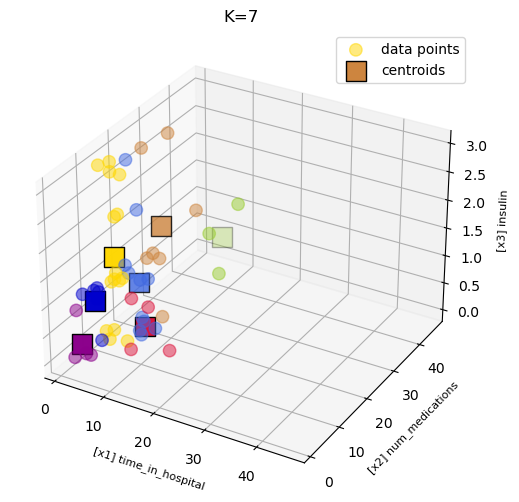

Dunn Index for [k = 7 ], 5 variables, 50 observations =   0.08304547985373997
K-means clustering for [k = 7 ], 5 variables, 100 observations


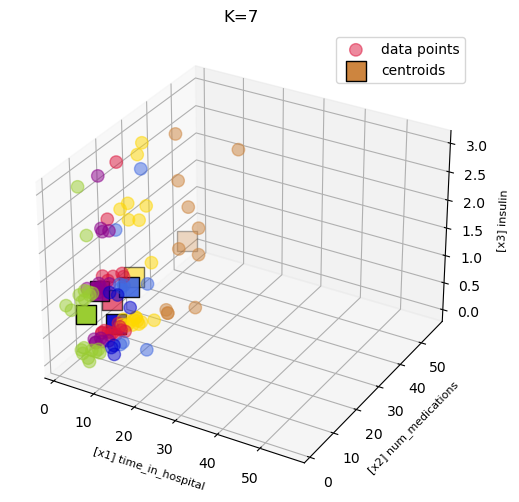

Dunn Index for [k = 7 ], 5 variables, 100 observations =   0.03446227583977888


In [27]:
# Rerun 2b 5 variables
print("K-means clustering for [k =",k,'], 5 variables, 50 observations')
clustered_data_50_5v, final_centroids_50_5v = kmeans(df_2c_50_5v,k)
plotClusters3D(clustered_data_50_5v,final_centroids_50_5v)
clusterlist_50_5v = cluster_list(clustered_data_50_5v,k)
dunnidx_50_5v = DunnIdx(clusterlist_50_5v)
print("Dunn Index for [k =",k,'], 5 variables, 50 observations =  ',dunnidx_50_5v)

print("K-means clustering for [k =",k,'], 5 variables, 100 observations')
clustered_data_100_5v, final_centroids_100_5v = kmeans(df_2c_100_5v,k)
plotClusters3D(clustered_data_100_5v,final_centroids_100_5v)
clusterlist_100_5v = cluster_list(clustered_data_100_5v,k)
dunnidx_100_5v = DunnIdx(clusterlist_100_5v)
print("Dunn Index for [k =",k,'], 5 variables, 100 observations =  ',dunnidx_100_5v)

### 2d. Centroids Positioning
        Observations - 50, 100, 200

In [37]:
# given centroids calculate min and max difference between centroids
def min_max_dist_Centroids(Centroids):
    '''
    Given Centroids dataframe get min and max distance between centroid
    input:
        Centroids - pandas data frame of computed centroids
    output:
        min_dist - min distance between centroids
        max_dist - max distance between centroids
    '''
    min_dist = np.Inf
    max_dist = 0
    for i in range(len(Centroids)-1):
        for j in range(1,len(Centroids)):
            if i >= j:
                continue
            dist = distanceFn(Centroids.iloc[i,:],Centroids.iloc[j,:])
            min_dist = min(min_dist,dist)
            max_dist = max(max_dist,dist)
    return min_dist, max_dist


# input data
df_2d_50 = df_1a.sample(50).reset_index(drop=True)
df_2d_100 = df_1a.sample(100).reset_index(drop=True)
df_2d_200 = df_1a.sample(200).reset_index(drop=True)


dunnidx_vector_50 = []
dunnidx_vector_100 = []
dunnidx_vector_200 = []
min_centroids_dist_vector_50 = []
max_centroids_dist_vector_50 = []
min_centroids_dist_vector_100 = []
max_centroids_dist_vector_100 = []
min_centroids_dist_vector_200 = []
max_centroids_dist_vector_200 = []
k = range(2,11) # 2 to 10
for i in range(len(k)):
    #print(k[i])
    clustered_data_2d_50, final_centroids_2d_50 = kmeans(df_2d_50,k[i])
    clustered_data_2d_100, final_centroids_2d_100 = kmeans(df_2d_100,k[i])
    clustered_data_2d_200, final_centroids_2d_200 = kmeans(df_2d_200,k[i])
    min_dist_50, max_dist_50 = min_max_dist_Centroids(final_centroids_2d_50)
    min_dist_100, max_dist_100 = min_max_dist_Centroids(final_centroids_2d_100)
    min_dist_200, max_dist_200 = min_max_dist_Centroids(final_centroids_2d_200)
    min_centroids_dist_vector_50.append(min_dist_50)
    max_centroids_dist_vector_50.append(max_dist_50)
    min_centroids_dist_vector_100.append(min_dist_100)
    max_centroids_dist_vector_100.append(max_dist_100)
    min_centroids_dist_vector_200.append(min_dist_200)
    max_centroids_dist_vector_200.append(max_dist_200)

    clusterlist_50 = cluster_list(clustered_data_2d_50,k[i])
    clusterlist_100 = cluster_list(clustered_data_2d_100,k[i])
    clusterlist_200 = cluster_list(clustered_data_2d_200,k[i])

    dunnidx_vector_50.append(DunnIdx(clusterlist_50))
    dunnidx_vector_100.append(DunnIdx(clusterlist_100))
    dunnidx_vector_200.append(DunnIdx(clusterlist_200))

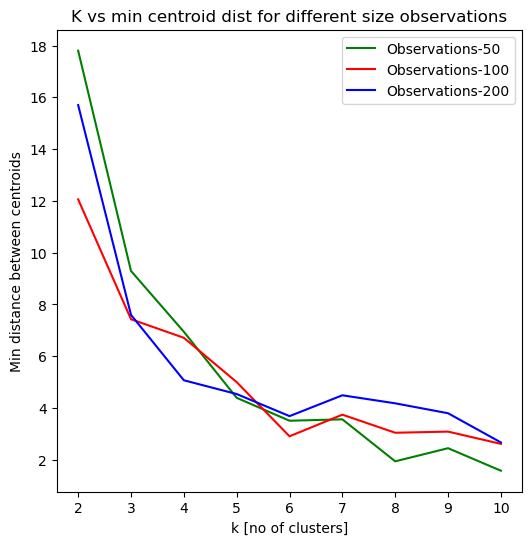

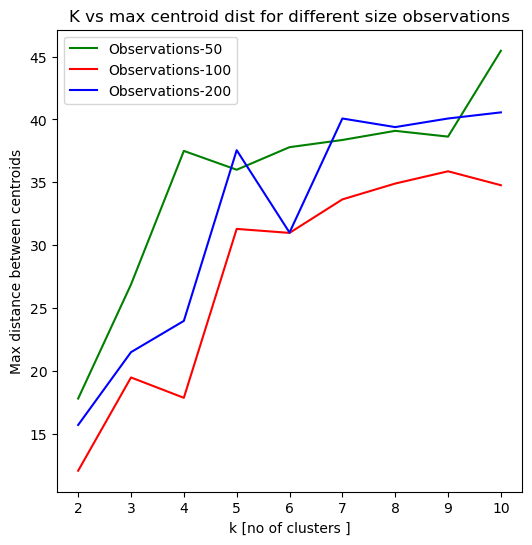

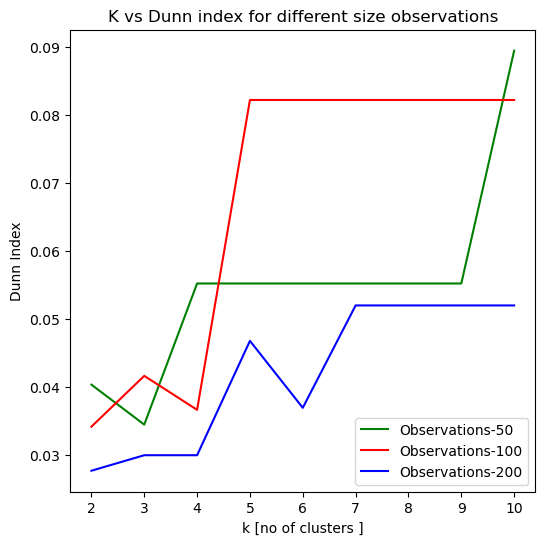

In [38]:
# Plots Effect of size observation size on distance between centroids
k = range(2,11)
fig = plt.figure(figsize = (6, 6))
plt.plot(k,min_centroids_dist_vector_50,color='g')
plt.plot(k,min_centroids_dist_vector_100,color='r')
plt.plot(k,min_centroids_dist_vector_200,color='b')
plt.xlabel('k [no of clusters]')
plt.ylabel('Min distance between centroids')
plt.legend(['Observations-50','Observations-100','Observations-200'])
plt.title('K vs min centroid dist for different size observations')
plt.show()

fig = plt.figure(figsize = (6, 6))
plt.plot(k,max_centroids_dist_vector_50,color='g')
plt.plot(k,max_centroids_dist_vector_100,color='r')
plt.plot(k,max_centroids_dist_vector_200,color='b')
plt.xlabel('k [no of clusters ]')
plt.ylabel('Max distance between centroids')
plt.legend(['Observations-50','Observations-100','Observations-200'])
plt.title('K vs max centroid dist for different size observations')
plt.show()

fig = plt.figure(figsize = (6, 6))
plt.plot(k,dunnidx_vector_50,color='g')
plt.plot(k,dunnidx_vector_100,color='r')
plt.plot(k,dunnidx_vector_200,color='b')
plt.xlabel('k [no of clusters ]')
plt.ylabel('Dunn Index')
plt.legend(['Observations-50','Observations-100','Observations-200'])
plt.title('K vs Dunn index for different size observations')
plt.show()

## 3. Fuzzy C-means clustering

In [30]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
# In Fuzzy weights calculations it gives runtime warning when denominator is zero
# using this import I am ignoring this warning

# Fuzzy Weights 
def FuzzyWeights(dataFrame, Centroids, m=2):
    '''
    FuzzyWeights calculates weights
    input- 
        dataFrame - pandas data frame of given data
        Centroids - pandas data frame of centroids
        m - defalut - 2 Fuzzifier
    output-
        fuzzy_weights - fuzzy weights matrix
    '''
    numerator_matrix = np.zeros([len(dataFrame),len(Centroids)])
    for i in range(len(Centroids)):
        distance_vector = []
        for j in range(len(dataFrame)):
            distance_vector.append(distanceFn(dataFrame.iloc[j],Centroids.iloc[i]))
        
        numerator_matrix[:,i] = ((1/np.array(distance_vector))**(2/(m-1)))
        #print(distance_vector)
    denominator_vector = numerator_matrix.sum(axis=1)
    denominator_vector = np.transpose([denominator_vector])
    fuzzy_weights = numerator_matrix/denominator_vector
    fuzzy_weights[np.isnan(fuzzy_weights)] = 1 # when weight is infinite it gives value nan so replace it with 1 
    return fuzzy_weights

# Fuzzy Centroids
def update_FuzzyCentroids(dataFrame, weights, old_centroids, m=2):
    '''
    update_FuzzyCentroids calculates weights
    input- 
        dataFrame - pandas data frame of given data
        fuzzy_weights - fuzzy weights matrix
        old_centroids - pandas data frame of old centroids
        m - defalut - 2 Fuzzifier
    output-
        new_centroids - pandas data frame of updated centroids
    '''
    new_centroids = old_centroids.copy()
    for i in range(len(new_centroids)):
        denominator = sum(weights[:,i]**m) # weighted sum of selected cluster
        for j in range(dataFrame.shape[1]):
            numerator = sum(dataFrame.iloc[:,j]*(weights[:,i]**m))
            new_centroids.iloc[i,j] = numerator/denominator
    return new_centroids

# Fuzzy C-means clustering
def Fuzzy_Cmeans(dataFrame,k, m=2, tol=1e-3):
    '''
    Fuzzy C-means implementation 
    input- 
        dataFrame - pandas data frame of given data
        k - number of clusters
        m - defalut 2, Fuzzifier
        to - tolerance (for stopping the iterations), defalut - 1E-2
    output-
        data - pandas dataframe with assigned centroids and distance of point from that centroid as added data variables in dataset
        centroids - final centroids locations
    '''
    data = dataFrame.copy()

    # we sum weights of all varibale and consider maximum one with max change to calculate stop
    max_weight_sum_change = []
    flag = True
    
    # Step : Initiate clusters by defining centroids 
    centroids = get_centroids(dataFrame,k)

    while(flag):
        # Step : Calculate weights
        weights = FuzzyWeights(data,centroids)
        # Step : Update centroid
        old_centroids = centroids.copy()
        centroids = update_FuzzyCentroids(data,weights,old_centroids)

        # calculate maximum change in centroid
        max_change = 0
        for i in range(k):
            centroid_change = distanceFn(old_centroids.iloc[i],centroids.iloc[i])
            max_change = max(max_change,centroid_change)

        if max_change <=tol:
            flag = False
    
    weights = FuzzyWeights(data,centroids)
    centroids = update_FuzzyCentroids(data,weights,old_centroids)
    data = assign_centroids(data, centroids)
    return data, centroids, weights 


### 3a. Fuzzy C-means on 1000 random samples

Fuzzy C-means clustering for k = 7
Fuzzy Centroid locations for k = 7
     time_in_hospital  num_medications
441          7.922334        29.893616
70           5.485572        22.253768
534          8.961197        43.564794
654          2.701173        11.276752
326          3.128472        16.981969
819          6.798002        14.192281
917          2.245411         6.395503


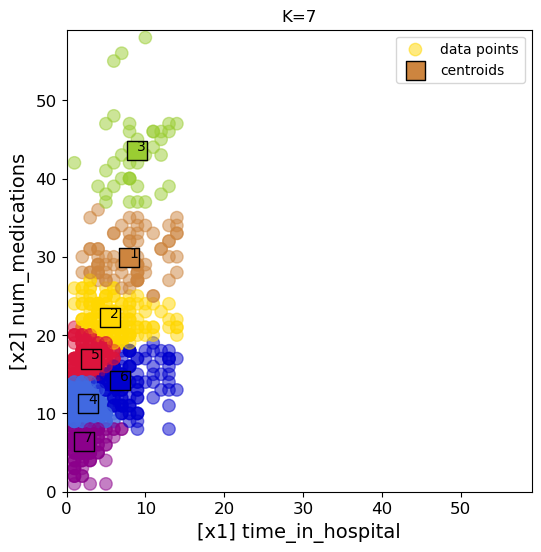

Dunn Index for [k = 7 ], Fuzzy Cluster =   0.04632410546120795


In [31]:
#Fuzzifier
m = 2

# Best number of variables selected 3
print("Fuzzy C-means clustering for k =",k)
clustered_data_3a, final_centroids_3a, final_weights_3a = Fuzzy_Cmeans(df_1a,k)
print("Fuzzy Centroid locations for k =",k)
print(final_centroids_3a)
plotClusters(clustered_data_3a,final_centroids_3a)
clusterlist_3a = cluster_list(clustered_data_3a,k)
dunnidx_3a = DunnIdx(clusterlist_3a)
print("Dunn Index for [k =",k,'], Fuzzy Cluster =  ',dunnidx_3a)

### 3b. Harden the cluster assignment of Fuzzy C-means

Fuzzy C-means clustering [m=1] for k = 7
Fuzzy Centroid locations [m=1] for k = 7
     time_in_hospital  num_medications
816          8.961166        43.564526
956          7.921904        29.892989
70           5.485496        22.253079
687          2.701262        11.276414
278          2.245372         6.395327
616          6.798281        14.192544
323          3.128100        16.981216


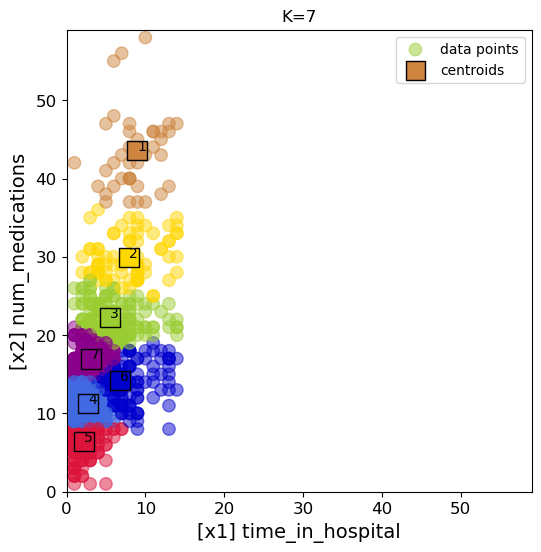

Dunn Index for[m=1] [k = 7 ], Fuzzy Cluster =   0.04632410546120795


In [32]:
#Fuzzifier 
m = 1 # hardening of cluster assignment
# Best number of variables selected 2
print("Fuzzy C-means clustering [m=1] for k =",k,)
clustered_data_3b, final_centroids_3b, final_weights_3b = Fuzzy_Cmeans(df_1a,k,m)
print("Fuzzy Centroid locations [m=1] for k =",k)
print(final_centroids_3b)
plotClusters(clustered_data_3b,final_centroids_3b)
clusterlist_3b = cluster_list(clustered_data_3b,k)
dunnidx_3b = DunnIdx(clusterlist_3b)
print("Dunn Index for[m=1] [k =",k,'], Fuzzy Cluster =  ',dunnidx_3b)

### 3c. Add variable into the model

Fuzzy C-means clustering for [k = 7 ], 3 variables


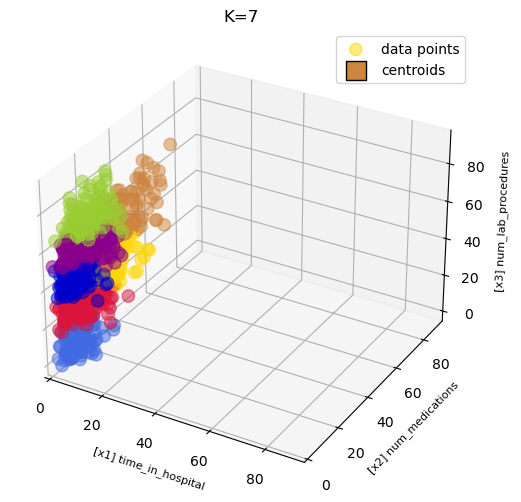

Dunn Index for [k = 7 ], 3 variables =   0.0


In [34]:
# Input 2a
# Added variable num_lab_procedures
df_3c = df_1000.filter(items=['time_in_hospital','num_medications','num_lab_procedures'])
df_3c = df_3c.reset_index(drop=True)

print("Fuzzy C-means clustering for [k =",k,'], 3 variables')
clustered_data_3c, final_centroids_3c, final_weights_3c = Fuzzy_Cmeans(df_3c,k,m=2)
plotClusters3D(clustered_data_3c,final_centroids_3c)
clusterlist_3c = cluster_list(clustered_data_3c,k)
dunnidx_3c = DunnIdx(clusterlist_3c)
print("Dunn Index for [k =",k,'], 3 variables =  ',dunnidx_3c)